In [1]:
import pandas as pd

# Load the dataset to inspect its structure
walmart_data = pd.read_csv(r"C:\Users\Aakriti K C\Desktop\DA and AI\walmart project\Walmart_Sales.csv")

# Display the first few rows and summary information
walmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Checking for missing values and duplicate rows
missing_values = walmart_data.isnull().sum()
duplicates = walmart_data.duplicated().sum()

# Display results
missing_values,duplicates

(Store           0
 Date            0
 Weekly_Sales    0
 Holiday_Flag    0
 Temperature     0
 Fuel_Price      0
 CPI             0
 Unemployment    0
 dtype: int64,
 0)

In [7]:
# Display column names, data types, and basic statistical summary
column_info = walmart_data.dtypes
statistical_summary = walmart_data.describe()

column_info, 

(Store             int64
 Date             object
 Weekly_Sales    float64
 Holiday_Flag      int64
 Temperature     float64
 Fuel_Price      float64
 CPI             float64
 Unemployment    float64
 dtype: object,)

In [9]:
statistical_summary

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
# Convert 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], errors='coerce')

# Check for invalid or missing conversions
invalid_dates = walmart_data['Date'].isna().sum()
walmart_data.fillna(method='ffill', inplace=True)

C:\Users\Aakriti K C\AppData\Local\Temp\ipykernel_9532\1053278683.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  walmart_data.fillna(method='ffill', inplace=True)


In [21]:
walmart_data.drop_duplicates(inplace=True)

In [19]:
# Display first few rows to confirm the conversion
sample_data = walmart_data.head(10)

sample_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-12-02,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-12-02,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-12-03,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-12-03,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


In [25]:
# Extract year, month, and day from the 'Date' column for feature engineering
walmart_data['Year'] = walmart_data['Date'].dt.year
walmart_data['Month'] = walmart_data['Date'].dt.month
walmart_data['Day'] = walmart_data['Date'].dt.day

# Add a 'Weekday' column
walmart_data['Weekday'] = walmart_data['Date'].dt.dayofweek

In [33]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,2010-12-02,1611968.17,0,39.93,2.514,211.289143,8.106,2010,12,2,3
3,1,2010-12-02,1409727.59,0,46.63,2.561,211.319643,8.106,2010,12,2,3
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0


In [29]:
# Basic descriptive statistics
summary_stats = walmart_data.describe()

summary_stats

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-07-21 21:59:09.650349568,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,7.895105,6.447552,2.643357
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000,0.000000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,6.000000,4.000000,0.000000
50%,23.000000,2011-08-04 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,8.000000,6.000000,3.000000
75%,34.000000,2012-06-01 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,10.000000,9.000000,4.000000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,12.000000,6.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,2.876977,3.238308,2.126936


In [35]:
# Group data by specific features for aggregation (e.g., store, department, year)
grouped_data = walmart_data.groupby(['Store', 'Year']).agg({
    'Weekly_Sales': ['mean', 'sum'],
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [37]:
# Identify numerical columns
numerical_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Remove outliers using the IQR method
for col in numerical_columns:
    Q1 = walmart_data[col].quantile(0.25)
    Q3 = walmart_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    walmart_data = walmart_data[(walmart_data[col] >= lower_bound) & (walmart_data[col] <= upper_bound)]

In [43]:
# Normalize numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
walmart_data[numerical_columns] = scaler.fit_transform(walmart_data[numerical_columns])

Text(0, 0.5, 'Frequency')

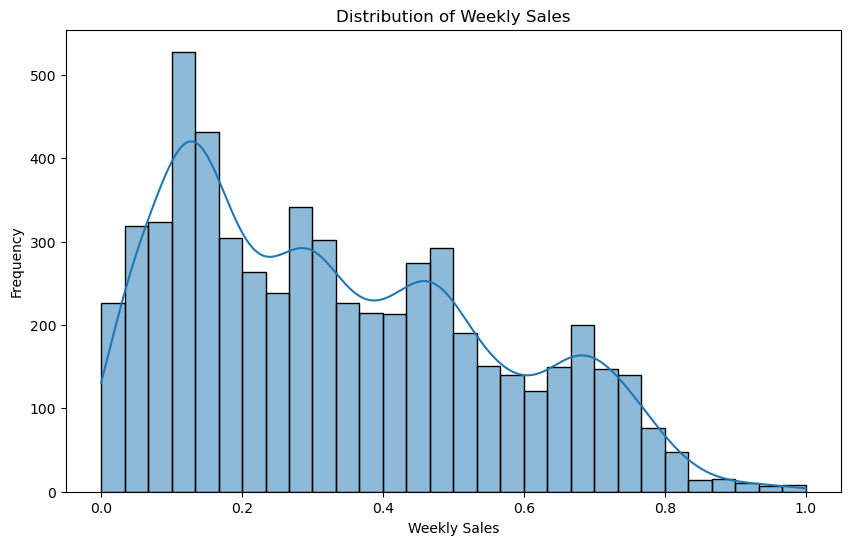

In [53]:
# --- Exploratory Data Analysis (EDA) ---
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(walmart_data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Heatmap')

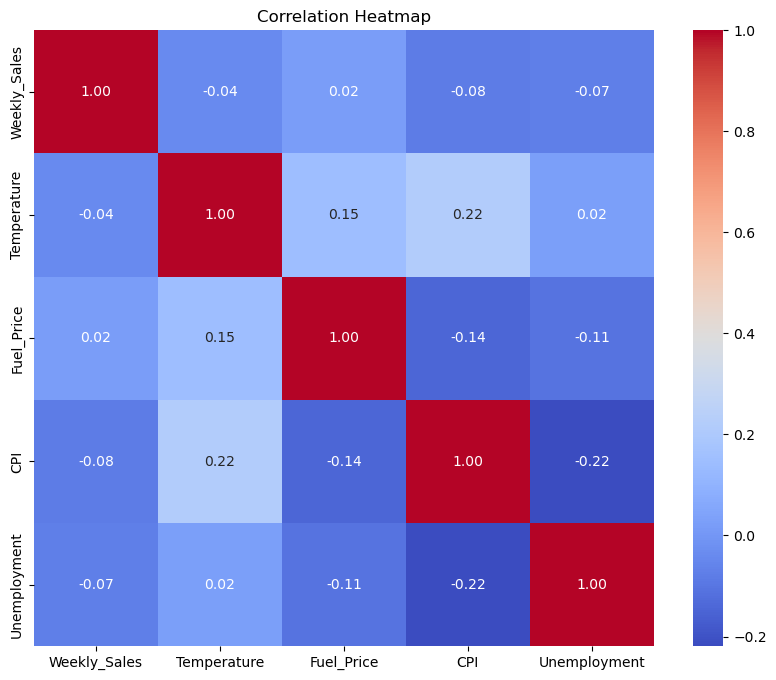

In [57]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = walmart_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Total Weekly Sales')

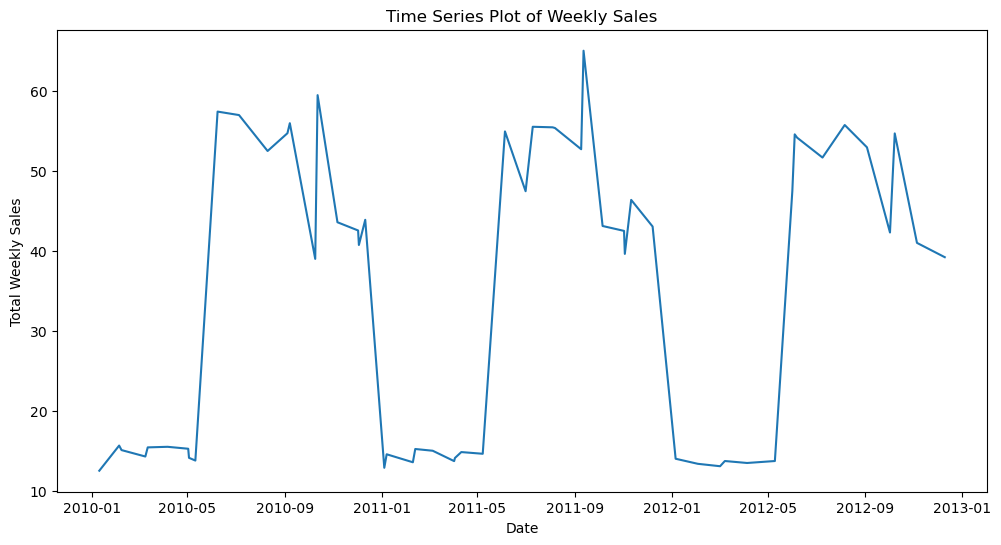

In [61]:
# 3. Time Series Plot for Weekly Sales
time_series_data = walmart_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data, x='Date', y='Weekly_Sales')
plt.title('Time Series Plot of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  

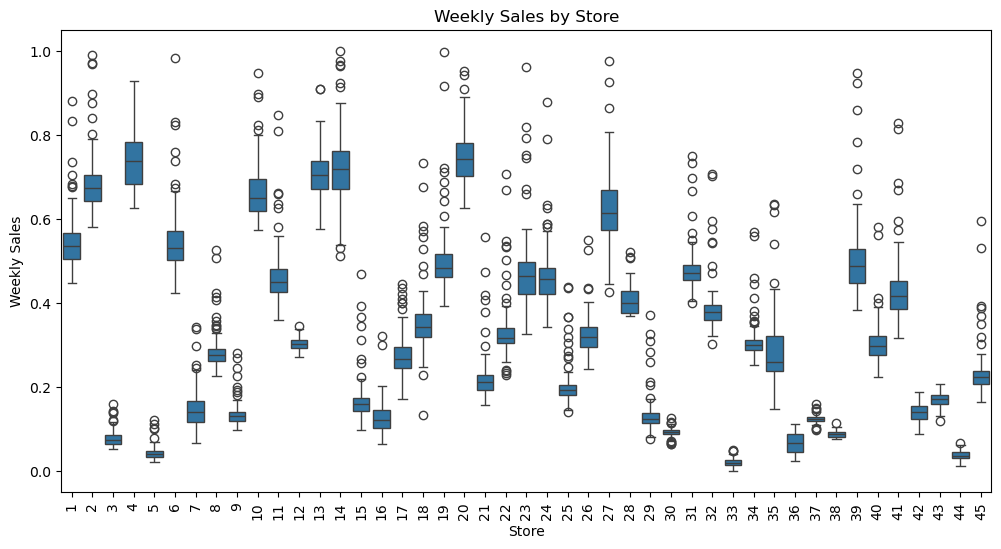

In [65]:
# 4. Boxplot of Weekly Sales by Store
plt.figure(figsize=(12, 6))
sns.boxplot(data=walmart_data, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)

Text(0, 0.5, 'Weekly Sales')

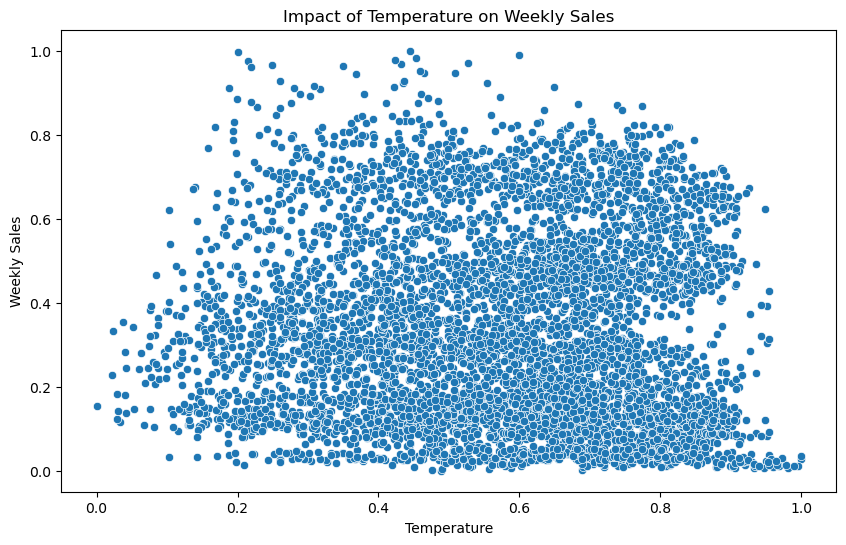

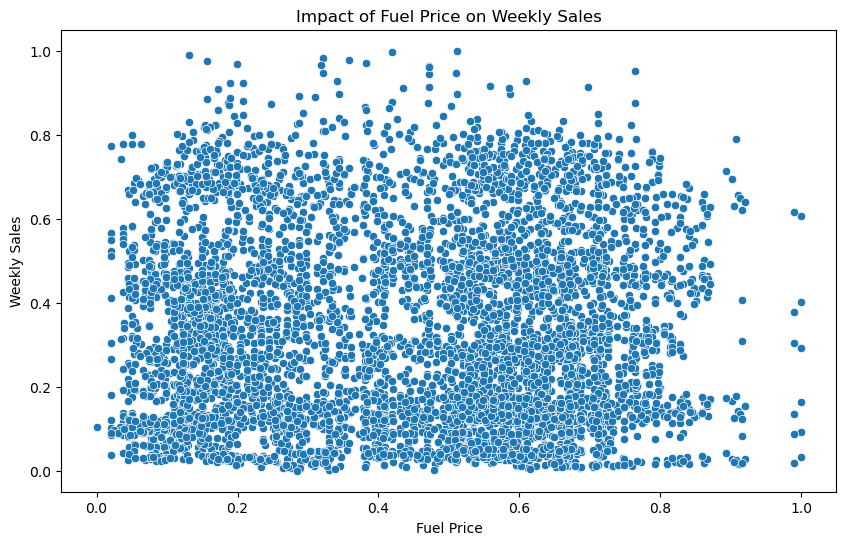

In [67]:
# 5. Impact of Temperature on Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=walmart_data, x='Temperature', y='Weekly_Sales')
plt.title('Impact of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# 6. Impact of Fuel Price on Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=walmart_data, x='Fuel_Price', y='Weekly_Sales')
plt.title('Impact of Fuel Price on Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature Selection
# Drop non-numeric columns and target variable (Weekly_Sales) for feature matrix
X = walmart_data.drop(columns=['Weekly_Sales', 'Date'])

# One-Hot Encoding for Categorical Variables (if present)
X = pd.get_dummies(X, columns=['Store'], drop_first=True)

# Target Variable
y = walmart_data['Weekly_Sales']

In [97]:
# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Initialize Linear Regression Model
model = LinearRegression()

In [101]:
# Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make Predictions
y_pred = model.predict(X_test)

In [105]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.003104621517871929
R-squared (R2): 0.93998558496914


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert Weekly_Sales into a binary classification problem
# E.g., Classify whether Weekly_Sales is above the median sales value
threshold = walmart_data['Weekly_Sales'].median()
y_class = (walmart_data['Weekly_Sales'] > threshold).astype(int)

In [110]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
# Make predictions
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

In [114]:
# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [116]:
# Print Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9265202702702703
Precision: 0.9362831858407079
Recall: 0.9120689655172414
F1-Score: 0.9240174672489083


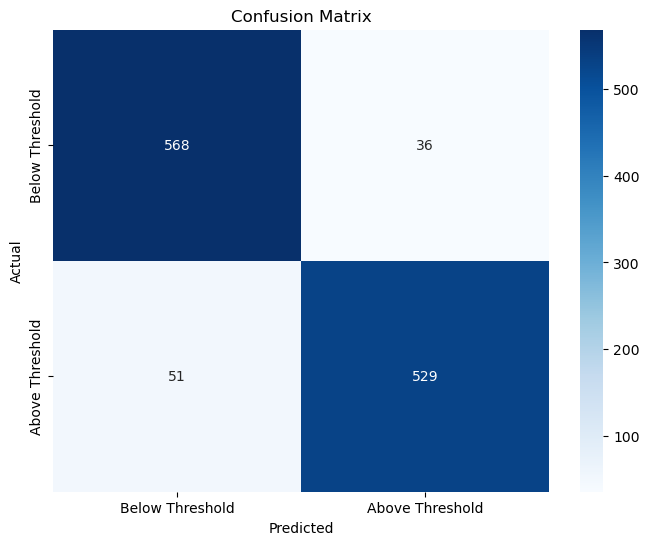

In [118]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Threshold', 'Above Threshold'], yticklabels=['Below Threshold', 'Above Threshold'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

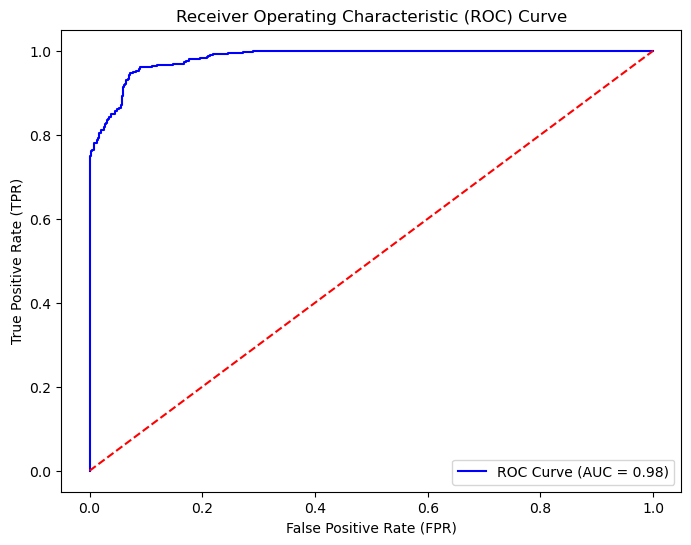

In [120]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Baseline
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## Interpretation and Improvements
Interpretation: Evaluate accuracy, precision, recall, F1-score, and AUC to understand model performance. For example:

- High precision means fewer false positives.
- High recall means fewer false negatives.
- A good AUC score indicates strong classifier separability.

## Suggested Improvements:

- Use more advanced algorithms such as Random Forest, Gradient Boosting (e.g., XGBoost or LightGBM).
- Perform feature engineering (e.g., create lagged features, moving averages).
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
- Address data imbalance if classes are highly skewed.